# Step 1: Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.feature_selection import RFE
import statsmodels.api as sm

# Step 2: Load and Explore the Dataset

In [2]:
df=pd.read_csv("/content/Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [4]:
df.shape

(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
print(df.isnull().sum())

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

# Step 3: Handle Missing Data

In [7]:
df_percentage=round(df.isna().sum()/len(df)*100,2)
df_percentage

,0
Prospect ID,0.00
Lead Number,0.00
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48


Dropping 5 columns with excessive missing values ≥ 45%

In [8]:
df.drop(columns=['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], inplace=True)

In [9]:
df.shape

(9240, 32)

Converting 'Select' to NaN to handle missing values

In [10]:
df.replace('Select', np.nan, inplace=True)

In [11]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,No,No,NaN,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,No,No,NaN,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,No,No,NaN,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,No,No,NaN,Mumbai,No,No,Modified


Imputing 11 categorical columns with mode

In [12]:
categorical_cols = ['Lead Source', 'Last Activity', 'Specialization', 'City',
                    'What is your current occupation', 'Lead Profile','What matters most to you in choosing a course',
                    'Lead Profile','Tags','How did you hear about X Education','Country']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [13]:
df_percentage=round(df.isna().sum()/len(df)*100,2)
df_percentage

,0
Prospect ID,0.00
Lead Number,0.00
Lead Origin,0.00
Lead Source,0.00
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48


Imputing 2 numerical columns with median

In [14]:
numerical_cols = ['TotalVisits', 'Page Views Per Visit']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

In [15]:
df_percentage=round(df.isna().sum()/len(df)*100,2)
df_percentage

,0
Prospect ID,0.0
Lead Number,0.0
Lead Origin,0.0
Lead Source,0.0
Do Not Email,0.0
Do Not Call,0.0
Converted,0.0
TotalVisits,0.0
Total Time Spent on Website,0.0
Page Views Per Visit,0.0


In [16]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,No,No,Potential Lead,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,No,No,Potential Lead,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,No,No,Potential Lead,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,No,Modified


# Step 4: Drop Unnecessary Columns

Drop Unique Identifiers/ High-Cardinality Columns since they are not predictive features

In [17]:
df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)  # Remove unique IDs

In [18]:
df.shape

(9240, 30)

# Step 5: Handle Categorical Variables

Checking Unique Values in Categorical Columns

In [19]:
categorical_cols = df.select_dtypes(include=['object']).columns  # Get categorical columns
df[categorical_cols].nunique().sort_values(ascending=False)  # See unique values per column

,0
Country,38
Tags,26
Lead Source,21
Specialization,18
Last Activity,17
Last Notable Activity,16
How did you hear about X Education,9
City,6
What is your current occupation,6
Lead Profile,5


Frequency Encoding for High-Cardinality Columns

In [20]:
high_cardinality_cols = ['Country', 'Tags']
for col in high_cardinality_cols:
    df[col] = df[col].map(df[col].value_counts(normalize=True))  # Replace with frequency

In [21]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,0.968939,...,No,No,0.055519,No,No,Potential Lead,Mumbai,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,0.968939,...,No,No,0.130195,No,No,Potential Lead,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,0.968939,...,No,No,0.587121,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,0.968939,...,No,No,0.130195,No,No,Potential Lead,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,0.968939,...,No,No,0.587121,No,No,Potential Lead,Mumbai,No,No,Modified


Convert categorical features into numerical format using one-hot encoding.

In [22]:
categorical_cols = ['Lead Source', 'Specialization', 'Last Activity', 'Last Notable Activity',
                    'City', 'What is your current occupation', 'Lead Profile',
                    'Lead Origin', 'What matters most to you in choosing a course',
                    'Do Not Call', 'Do Not Email', 'Search', 'Newspaper Article',
                    'Newspaper', 'Digital Advertisement', 'Through Recommendations',
                    'A free copy of Mastering The Interview']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [23]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,How did you hear about X Education,Magazine,X Education Forums,Receive More Updates About Our Courses,Tags,...,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Do Not Call_Yes,Do Not Email_Yes,Search_Yes,Newspaper Article_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes
0,0,0.0,0,0.0,0.968939,Online Search,No,No,No,0.055519,...,False,False,False,False,False,False,False,False,False,False
1,0,5.0,674,2.5,0.968939,Online Search,No,No,No,0.130195,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.0,0.968939,Online Search,No,No,No,0.587121,...,False,False,False,False,False,False,False,False,False,True
3,0,1.0,305,1.0,0.968939,Word Of Mouth,No,No,No,0.130195,...,False,False,False,False,False,False,False,False,False,False
4,1,2.0,1428,1.0,0.968939,Other,No,No,No,0.587121,...,False,False,False,False,False,False,False,False,False,False


# Step 6: Train-Test Split

In [25]:
# Define features and target variable
X = df.drop(columns=['Converted'])  # Independent variables
y = df['Converted']  # Target variable

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [27]:
X_train.shape

(7392, 108)

In [28]:
X_test.shape

(1848, 108)

In [29]:
y_train.shape

(7392,)

In [30]:
y_test.shape

(1848,)

In [40]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Fix applied



In [41]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform on training data
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])

# Transform test data
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Convert to DataFrame
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols))
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and merge encoded data
X_train = X_train.drop(columns=categorical_cols).reset_index(drop=True)
X_test = X_test.drop(columns=categorical_cols).reset_index(drop=True)

X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)


# Step 7: Feature Scaling

Feature Scaling using StandardScaler()

In [42]:
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [44]:
X_train[numerical_cols].head()

,TotalVisits,Page Views Per Visit
0,-0.291542,-0.167231
1,-0.084243,-0.396438
2,0.330355,1.208008
3,0.330355,1.208008
4,1.988748,4.875311


In [45]:
X_test[numerical_cols].head()

,TotalVisits,Page Views Per Visit
0,0.537654,1.666420
1,-0.706141,-1.084057
2,-0.291542,-0.167231
3,-0.084243,0.291182
4,0.123056,0.749595


In [46]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)


Categorical Columns: Index([], dtype='object')


# Step 8: Train Logistic Regression Model

In [49]:
# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=500, solver='liblinear')
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=500, solver='liblinear')

# Step 9: Model Evaluation

Accuracy: 0.8366


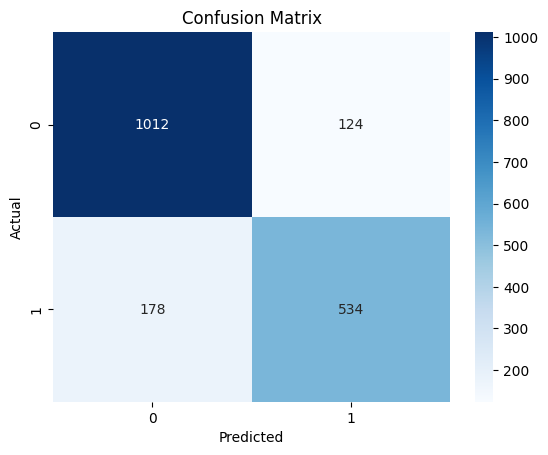

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1136
           1       0.81      0.75      0.78       712

    accuracy                           0.84      1848
   macro avg       0.83      0.82      0.82      1848
weighted avg       0.84      0.84      0.84      1848

ROC-AUC Score: 0.8849


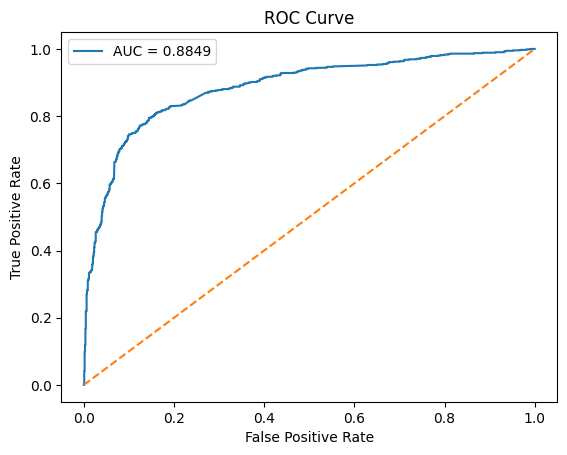

In [50]:
# Predictions
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_score = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_score:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_score:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
